[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\clark\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Total respondents per course: {'BSIT': 17, 'BSCS': 15}
Total number of respondents: 32
Number of responses for sentiment analysis: 224
Corresponding tokens 224
Dataframe for sentiment analysis                                                   Text  \
0    If we rate that from 1-10, I rate it 5. Not al...   
1    Even if I have cellular network, wifi But at s...   
2    For me it's average. Sometime I can cope up an...   
3    At first, I found it difficult because we're s...   
4    Using the Distance learning technologies is ea...   
..                                                 ...   
219  I believe distance education is not that bad, ...   
220          Not that good, but still trying to adjust   
221           i feel nothing about distance education.   
222  I just think I'll be more and discover through...   
223  It's good in terms of financial issues but in ...   

                                                Tokens  Question Number  
0    [rate, rate, 5, students, budge

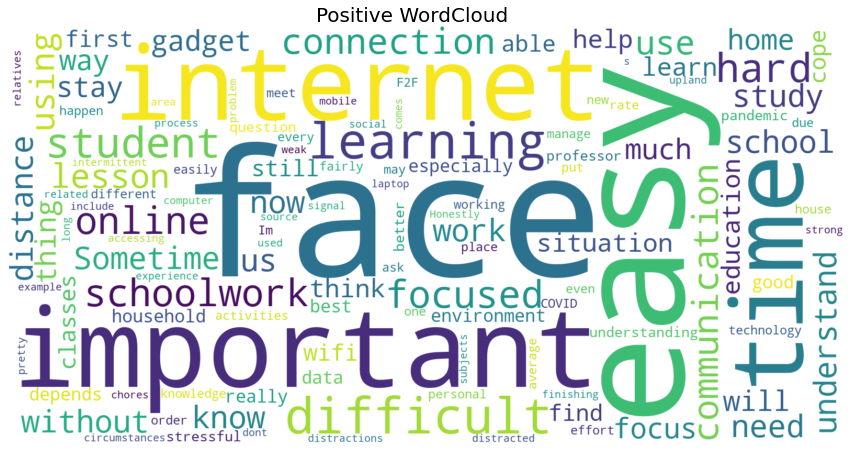

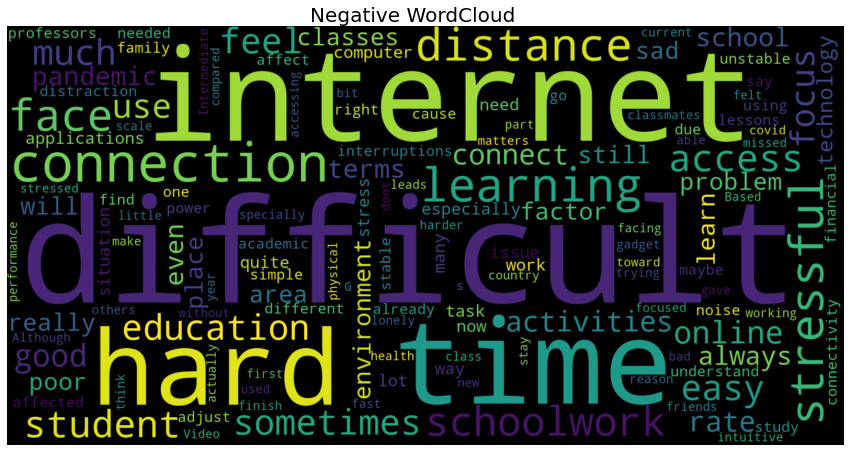

In [1]:
"""
Tester Code
"""
from sentiments import TextProcessor, Visualizer, MachineLearning
import os

path = os.path.join(os.getcwd(), "sample_data/Student' s Perception towards Online Learning Questionnaire.csv")

#create data object
data = TextProcessor.TextProcessor()
data.parser(path=path)
print('Total respondents per course: {}'.format(data.dict_respondents_course))
print('Total number of respondents: {}'.format(data.int_respondents_count))
#print('Tokens per question {}'.format(data.list_tokens_per_question))
print('Number of responses for sentiment analysis: {}\nCorresponding tokens {}'.format(len(data.list_texts), len(data.list_tokens_per_text)))
print('Dataframe for sentiment analysis {}'.format(data.df_final_data_for_sentiment_analysis))

machine_learning_processes = MachineLearning.MachineLearning(df_for_sentiment_analysis=data.df_final_data_for_sentiment_analysis,
                                                             tokens_per_question=data.list_tokens_per_question,
                                                             respondents_by_course=data.dict_respondents_course,
                                                             respondents_by_block=data.dict_respondents_block,
                                                             total_respondents=data.int_respondents_count)
machine_learning_processes.exploratory_data_analysis(n_words=5)
machine_learning_processes.sentiment_analysis()
#print('Sentiment Analysis\n{}'.format(machine_learning_processes.df_sentiment_analysis_result))
#print('Positive Texts\n{}'.format(machine_learning_processes.df_positive_predicted_sentiments))
machine_learning_processes.LatentDirichletAllocation(
    tokens= machine_learning_processes.df_negative_predicted_sentiments['Tokens'].tolist(),
    filename_lda_model= 'all_generated\\negative.gensim',
    filename_corpus= 'all_generated\\negative_corpus.pkl',
    filename_dictionary= 'all_generated\\negative_dictionary.gensim'
)
machine_learning_processes.LatentDirichletAllocation(
    tokens=machine_learning_processes.df_positive_predicted_sentiments['Tokens'].tolist(),
    filename_lda_model = 'all_generated\\positive.gensim',
    filename_corpus= 'all_generated\\positive_corpus.pkl',
    filename_dictionary= 'all_generated\\positive_dictionary.gensim'
)
positive_wordCloud = Visualizer.Visualizer()
positive_wordCloud.wordCloud(text=machine_learning_processes.df_positive_predicted_sentiments['Text'].tolist(),
                             color='white', title='Positive WordCloud', output_file='all_generated\\positive_wordcloud.png')
negative_wordCloud = Visualizer.Visualizer()
negative_wordCloud.wordCloud(text=machine_learning_processes.df_negative_predicted_sentiments['Text'].tolist(),
                             color='black', title='Negative WordCloud', output_file='all_generated\\negative_wordcloud.png')

In [2]:
'''
LDA of Negative responses
'''
import pyLDAvis
import gensim
import pickle
pyLDAvis.enable_notebook()
lda = 'all_generated\\negative.gensim'
dictionary = gensim.corpora.Dictionary.load('all_generated\\negative_dictionary.gensim')
corpus = pickle.load(open('all_generated\\negative_corpus.pkl', 'rb'))
lda_model = gensim.models.ldamodel.LdaModel.load(lda)
pyLDAvis.enable_notebook()
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_display)

C:\Users\clark\.conda\envs\sentiments\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [3]:
'''
LDA of Positive responses
'''
import pyLDAvis
import gensim
import pickle
pyLDAvis.enable_notebook()
lda = 'all_generated\\positive.gensim'
dictionary = gensim.corpora.Dictionary.load('all_generated\\positive_dictionary.gensim')
corpus = pickle.load(open('all_generated\\positive_corpus.pkl', 'rb'))
lda_model = gensim.models.ldamodel.LdaModel.load(lda)
pyLDAvis.enable_notebook()
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_display)

C:\Users\clark\.conda\envs\sentiments\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
